[['/Users/lerfich/Documents/lab2/task2/pipes-4.jpg', 118], ['/Users/lerfich/Documents/lab2/task2/pipes-5.jpg', 152], ['/Users/lerfich/Documents/lab2/task2/pipes-6.jpg', 245], ['/Users/lerfich/Documents/lab2/task2/logs-1.jpg', 71], ['/Users/lerfich/Documents/lab2/task2/logs-2.jpg', 172]] imgs


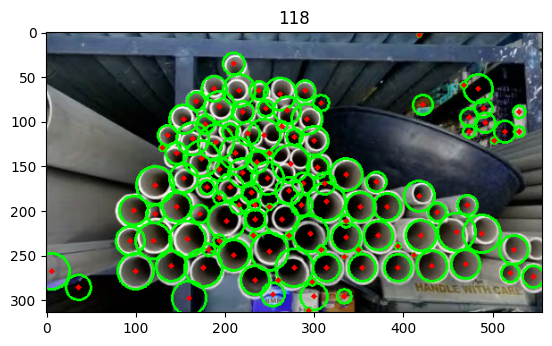

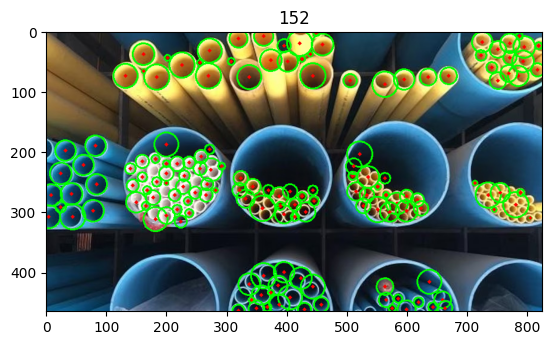

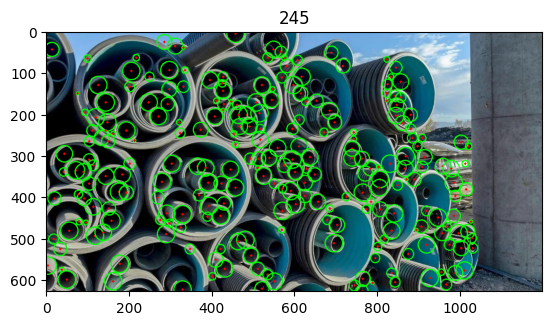

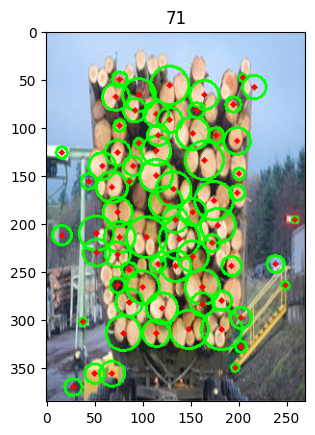

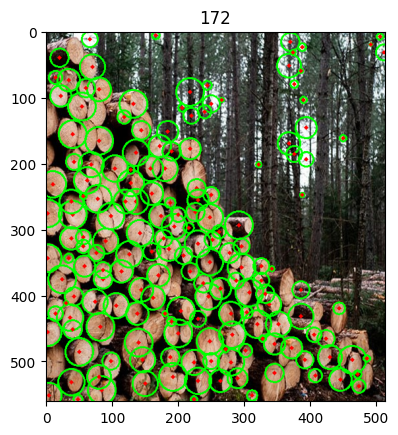

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import glob


def func(file_name): 
    src = cv.imread(file_name)

    src = cv.cvtColor(src, cv.COLOR_BGR2RGB)

    gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
    # blur = cv.blur(gray, (3, 3)) # Apply blur with a 3x3 kernel
    blur = cv.medianBlur(gray, 7)
    # plt.imshow(blur, 'gray')
    plt.figure()


    circles = cv.HoughCircles(
            blur, 
            cv.HOUGH_GRADIENT, dp=1, minDist=15, param1=300, param2=10, minRadius=0, maxRadius=22
        )

    detected_circles = circles[0]

    # Удаление пересекающихся кругов (точнее оставляем только один из них)
    filtered_circles = []

    MAXIMUM_INTERSECTION_FRACTION_AREAS = 0.5   

    image = src.copy()
    saved_circles = []
    pipes_count = 0


    if circles is not None:


        for i in range(len(detected_circles)):    
            points = circles[0][i]
            a, b, r = points[0], points[1], points[2]
            circle1 = Point(a, b).buffer(r)
            is_save = True

            for j in range(len(saved_circles)):
                if i != j:
                    a1, b1, r1 = saved_circles[j]
                    circle2 = Point(a1, b1).buffer(r1)
                    area = circle1.intersection(circle2).area
                    if MAXIMUM_INTERSECTION_FRACTION_AREAS < area / min(circle1.area, circle2.area):
                        is_save = False
                        break
            if is_save:
                saved_circles.append(points)    




    if saved_circles is not None:   

        saved_circles = np.uint16(np.around(saved_circles)) # Convert circle metadata to integers

        for points in saved_circles:
            a, b, r = points[0], points[1], points[2]

            cv.circle(image, (a, b), r, (0, 255, 0), 2)

            # Draw a small circle (of radius 1) to show the center.
            cv.circle(image, (a, b), 1, (255, 0, 0), 3)

            pipes_count += 1

    # print("Total pipes: ", len(saved_circles))
    plt.title(pipes_count)
    plt.imshow(image)
    return [file_name, pipes_count]

images = [func(file) for file in glob.glob('/Users/lerfich/Documents/lab2/task2/*.jpg')]

print(images, 'imgs')
                     


